In [53]:
from src import kernel

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1

Read data

In [3]:
df = pd.read_csv('./src/kernel/data/test_data1.csv')
df.head()

,0,1
0,-3.620286,-2.358816
1,-0.132184,-3.247832
2,-2.912721,-1.521750
3,-5.144268,4.760700
4,-5.693922,-2.663462


Compute kernelMean

In [4]:
kM = kernel.Mean(df,sigma='silverman')

Plot kernelMean

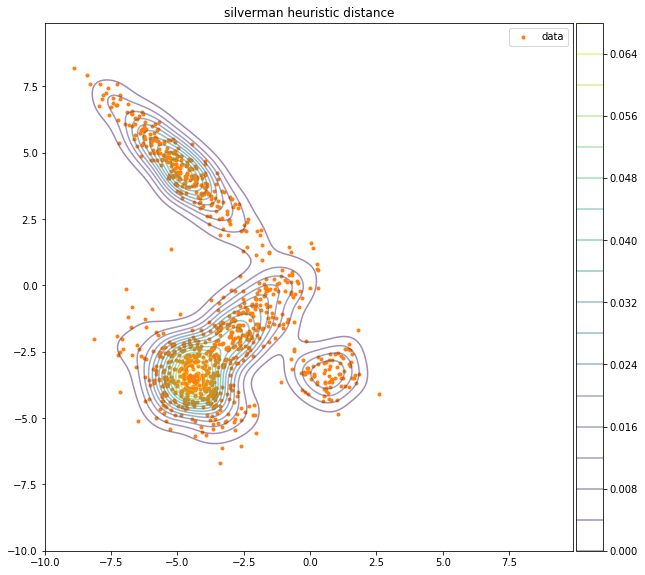

In [93]:
x = np.arange(-10.0,10,0.1)
y = np.arange(-10.0,10,0.1)
xx,yy = np.meshgrid(x,y)
z = kM.mu_p(np.array([xx.ravel(),yy.ravel()]).T)
zz = z.reshape(xx.shape[0],-1)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
bar = ax.contour(xx,yy,zz,20,alpha=0.5)
ax.scatter(df.iloc[:,0],df.iloc[:,1],alpha=1,marker='.',color='C1',label='data')
ax.set_title('silverman heuristic distance')

ax.legend()
ax.axis("image") 
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cax = divider.new_horizontal(size="5%", pad=0.05)
fig.add_axes(cax)
cbar = fig.colorbar(bar,cax=cax)
fig.show()

# KernelHerding

In [6]:
KH = kernel.Herding(kM)

In [7]:
for attr in dir(KH):
    if callable(getattr(KH, str(attr))):
        print(attr)

__class__
__delattr__
__dir__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
_argmax
_herding_update
_kernel_gradient_from_samples
_optimizer_TPE
_optimizer_scipy
approximation_mean
kernel
supersample


### Herding w/ powell

In [29]:
supersample_powell = KH.supersample(
    sample_size=50, 
    optimizer='scipy_optim', 
    method='powell')

'    100% |################################| 0day  0:00:00 Total time: 0day  0:00:02'

In [96]:
x = np.arange(-10.0,10,0.1)
y = np.arange(-10.0,10,0.1)
xx,yy = np.meshgrid(x,y)

herding_z = KH.approximation_mean(np.array([xx.ravel(),yy.ravel()]).T)
herding_z = herding_z.reshape(xx.shape[0],-1)

original_z = KH.KM.mu_p(np.array([xx.ravel(),yy.ravel()]).T)
original_z = original_z.reshape(xx.shape[0],-1)

original_samples = KH.KM.x.copy()

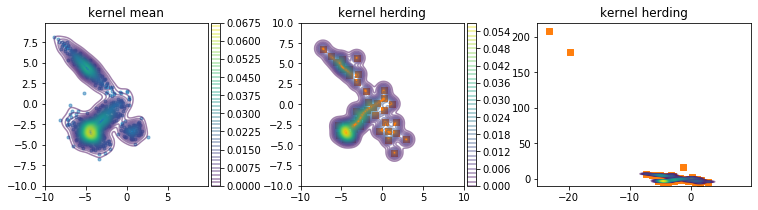

In [106]:
fig = plt.figure(figsize=[13,3])
ax1 = fig.add_subplot(131)
ax1.set_title('kernel mean')
cbar1 = ax1.contour(xx,yy,original_z,50,alpha=0.5)
ax1.scatter(original_samples.iloc[:,0], original_samples.iloc[:,1] ,alpha=0.5,marker='.')
ax1.set_xlim([-10,10])
ax1.set_ylim([-10,10])
ax1.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax1)
cax = divider.new_horizontal(size="5%", pad=0.05)
cax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
cax.yaxis.offsetText.set_fontsize(10)
cax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
fig.add_axes(cax)
fig.colorbar(cbar1,cax=cax)

ax2 = fig.add_subplot(132)
ax2.set_title('kernel herding')
cbar2 = ax2.contour(xx,yy,herding_z,50,alpha=0.5)
ax2.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
ax2.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax2)
cax2 = divider.new_horizontal(size="5%", pad=0.05)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
fig.add_axes(cax2)
fig.colorbar(cbar2,cax=cax2)

ax3 = fig.add_subplot(133)
ax3.set_title('kernel herding')
cbar3 = ax3.contour(xx,yy,herding_z,50,alpha=0.5)
ax3.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
fig.show()

### Herding w/ slsqp w/ constrain w/ jac

In [107]:
cons = ({'type': 'ineq',
         'fun' : lambda x: -(x[0] - 2.593)},
        {'type': 'ineq',
         'fun' : lambda x:  (x[0] + 8.9)},
        {'type': 'ineq',
         'fun' : lambda x: -(x[1] - 8.2)},
        {'type': 'ineq',
         'fun' : lambda x:  (x[1] + 6.6)})

supersample_slsqp = KH.supersample(
    sample_size=50, 
    optimizer='scipy_optim', 
    method='slsqp',
    constraints=cons,
    jac='grad')

'    100% |################################| 0day  0:00:00 Total time: 0day  0:00:01'

In [108]:
x = np.arange(-10.0,10,0.1)
y = np.arange(-10.0,10,0.1)
xx,yy = np.meshgrid(x,y)

herding_z = KH.approximation_mean(np.array([xx.ravel(),yy.ravel()]).T)
herding_z = herding_z.reshape(xx.shape[0],-1)

original_z = KH.KM.mu_p(np.array([xx.ravel(),yy.ravel()]).T)
original_z = original_z.reshape(xx.shape[0],-1)

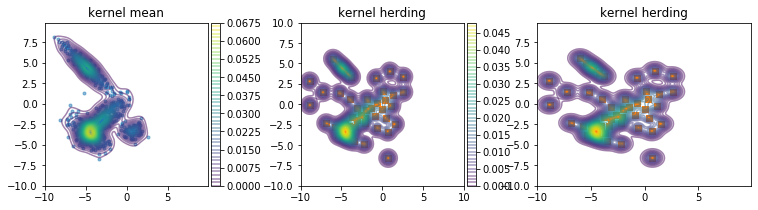

In [109]:
fig = plt.figure(figsize=[13,3])
ax1 = fig.add_subplot(131)
ax1.set_title('kernel mean')
cbar1 = ax1.contour(xx,yy,original_z,50,alpha=0.5)
ax1.scatter(original_samples.iloc[:,0], original_samples.iloc[:,1] ,alpha=0.5,marker='.')
ax1.set_xlim([-10,10])
ax1.set_ylim([-10,10])
ax1.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax1)
cax = divider.new_horizontal(size="5%", pad=0.05)
cax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
cax.yaxis.offsetText.set_fontsize(10)
cax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
fig.add_axes(cax)
fig.colorbar(cbar1,cax=cax)

ax2 = fig.add_subplot(132)
ax2.set_title('kernel herding')
cbar2 = ax2.contour(xx,yy,herding_z,50,alpha=0.5)
ax2.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
ax2.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax2)
cax2 = divider.new_horizontal(size="5%", pad=0.05)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
fig.add_axes(cax2)
fig.colorbar(cbar2,cax=cax2)

ax3 = fig.add_subplot(133)
ax3.set_title('kernel herding')
cbar3 = ax3.contour(xx,yy,herding_z,50,alpha=0.5)
ax3.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
fig.show()

### Herding w/ slsqp w/o constrain w/o jac

In [113]:
supersample_slsqp = KH.supersample(
    sample_size=50, 
    optimizer='scipy_optim', 
    method='slsqp')

'    100% |################################| 0day  0:00:00 Total time: 0day  0:00:01'

In [116]:
x = np.arange(-10.0,10,0.1)
y = np.arange(-10.0,10,0.1)
xx,yy = np.meshgrid(x,y)

herding_z = KH.approximation_mean(np.array([xx.ravel(),yy.ravel()]).T)
herding_z = herding_z.reshape(xx.shape[0],-1)

original_z = KH.KM.mu_p(np.array([xx.ravel(),yy.ravel()]).T)
original_z = original_z.reshape(xx.shape[0],-1)

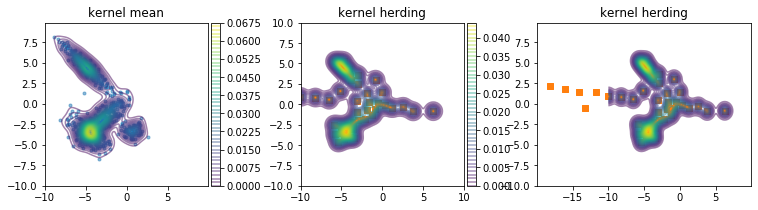

In [117]:
fig = plt.figure(figsize=[13,3])
ax1 = fig.add_subplot(131)
ax1.set_title('kernel mean')
cbar1 = ax1.contour(xx,yy,original_z,50,alpha=0.5)
ax1.scatter(original_samples.iloc[:,0], original_samples.iloc[:,1] ,alpha=0.5,marker='.')
ax1.set_xlim([-10,10])
ax1.set_ylim([-10,10])
ax1.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax1)
cax = divider.new_horizontal(size="5%", pad=0.05)
cax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
cax.yaxis.offsetText.set_fontsize(10)
cax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
fig.add_axes(cax)
fig.colorbar(cbar1,cax=cax)

ax2 = fig.add_subplot(132)
ax2.set_title('kernel herding')
cbar2 = ax2.contour(xx,yy,herding_z,50,alpha=0.5)
ax2.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
ax2.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax2)
cax2 = divider.new_horizontal(size="5%", pad=0.05)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
fig.add_axes(cax2)
fig.colorbar(cbar2,cax=cax2)

ax3 = fig.add_subplot(133)
ax3.set_title('kernel herding')
cbar3 = ax3.contour(xx,yy,herding_z,50,alpha=0.5)
ax3.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
fig.show()

### Herding w/ slsqp w/o constrain w/ jac

In [119]:
cons = ({'type': 'ineq',
         'fun' : lambda x: -(x[0] - 2.593)},
        {'type': 'ineq',
         'fun' : lambda x:  (x[0] + 8.9)},
        {'type': 'ineq',
         'fun' : lambda x: -(x[1] - 8.2)},
        {'type': 'ineq',
         'fun' : lambda x:  (x[1] + 6.6)})

supersample_slsqp = KH.supersample(
    sample_size=50, 
    optimizer='scipy_optim', 
    method='slsqp',
    jac='grad')

'    100% |################################| 0day  0:00:00 Total time: 0day  0:00:00'

In [120]:
x = np.arange(-10.0,10,0.1)
y = np.arange(-10.0,10,0.1)
xx,yy = np.meshgrid(x,y)

herding_z = KH.approximation_mean(np.array([xx.ravel(),yy.ravel()]).T)
herding_z = herding_z.reshape(xx.shape[0],-1)

original_z = KH.KM.mu_p(np.array([xx.ravel(),yy.ravel()]).T)
original_z = original_z.reshape(xx.shape[0],-1)

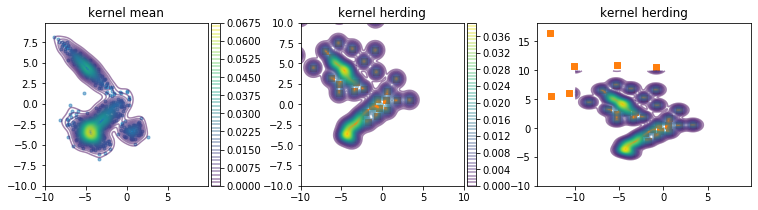

In [121]:
fig = plt.figure(figsize=[13,3])
ax1 = fig.add_subplot(131)
ax1.set_title('kernel mean')
cbar1 = ax1.contour(xx,yy,original_z,50,alpha=0.5)
ax1.scatter(original_samples.iloc[:,0], original_samples.iloc[:,1] ,alpha=0.5,marker='.')
ax1.set_xlim([-10,10])
ax1.set_ylim([-10,10])
ax1.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax1)
cax = divider.new_horizontal(size="5%", pad=0.05)
cax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
cax.yaxis.offsetText.set_fontsize(10)
cax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
fig.add_axes(cax)
fig.colorbar(cbar1,cax=cax)

ax2 = fig.add_subplot(132)
ax2.set_title('kernel herding')
cbar2 = ax2.contour(xx,yy,herding_z,50,alpha=0.5)
ax2.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
ax2.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax2)
cax2 = divider.new_horizontal(size="5%", pad=0.05)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
fig.add_axes(cax2)
fig.colorbar(cbar2,cax=cax2)

ax3 = fig.add_subplot(133)
ax3.set_title('kernel herding')
cbar3 = ax3.contour(xx,yy,herding_z,50,alpha=0.5)
ax3.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
fig.show()

### Herding w/ slsqp w/ constrain w/o jac

In [122]:
cons = ({'type': 'ineq',
         'fun' : lambda x: -(x[0] - 2.593)},
        {'type': 'ineq',
         'fun' : lambda x:  (x[0] + 8.9)},
        {'type': 'ineq',
         'fun' : lambda x: -(x[1] - 8.2)},
        {'type': 'ineq',
         'fun' : lambda x:  (x[1] + 6.6)})

supersample_slsqp = KH.supersample(
    sample_size=50, 
    optimizer='scipy_optim', 
    method='slsqp',
    constraints=cons)

'    100% |################################| 0day  0:00:00 Total time: 0day  0:00:01'

In [123]:
x = np.arange(-10.0,10,0.1)
y = np.arange(-10.0,10,0.1)
xx,yy = np.meshgrid(x,y)

herding_z = KH.approximation_mean(np.array([xx.ravel(),yy.ravel()]).T)
herding_z = herding_z.reshape(xx.shape[0],-1)

original_z = KH.KM.mu_p(np.array([xx.ravel(),yy.ravel()]).T)
original_z = original_z.reshape(xx.shape[0],-1)

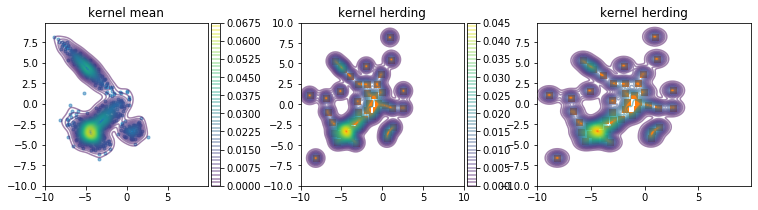

In [124]:
fig = plt.figure(figsize=[13,3])
ax1 = fig.add_subplot(131)
ax1.set_title('kernel mean')
cbar1 = ax1.contour(xx,yy,original_z,50,alpha=0.5)
ax1.scatter(original_samples.iloc[:,0], original_samples.iloc[:,1] ,alpha=0.5,marker='.')
ax1.set_xlim([-10,10])
ax1.set_ylim([-10,10])
ax1.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax1)
cax = divider.new_horizontal(size="5%", pad=0.05)
cax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
cax.yaxis.offsetText.set_fontsize(10)
cax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
fig.add_axes(cax)
fig.colorbar(cbar1,cax=cax)

ax2 = fig.add_subplot(132)
ax2.set_title('kernel herding')
cbar2 = ax2.contour(xx,yy,herding_z,50,alpha=0.5)
ax2.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
ax2.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax2)
cax2 = divider.new_horizontal(size="5%", pad=0.05)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
fig.add_axes(cax2)
fig.colorbar(cbar2,cax=cax2)

ax3 = fig.add_subplot(133)
ax3.set_title('kernel herding')
cbar3 = ax3.contour(xx,yy,herding_z,50,alpha=0.5)
ax3.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
fig.show()

### Herding w/ TPE

In [125]:
supersample_TPE = KH.supersample(50, optimizer='optuna', n_trials = 60)

'    100% |################################| 0day  0:00:00 Total time: 0day  0:15:59'

In [126]:
x = np.arange(-10.0,10,0.1)
y = np.arange(-10.0,10,0.1)
xx,yy = np.meshgrid(x,y)

herding_z = KH.approximation_mean(np.array([xx.ravel(),yy.ravel()]).T)
herding_z = herding_z.reshape(xx.shape[0],-1)

original_z = KH.KM.mu_p(np.array([xx.ravel(),yy.ravel()]).T)
original_z = original_z.reshape(xx.shape[0],-1)

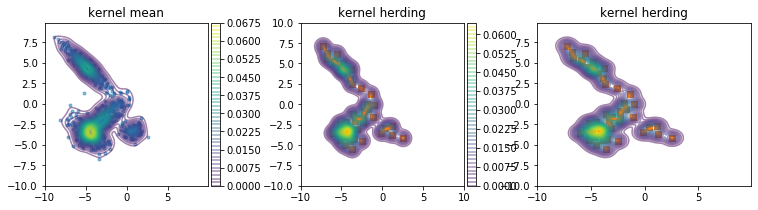

In [127]:
fig = plt.figure(figsize=[13,3])
ax1 = fig.add_subplot(131)
ax1.set_title('kernel mean')
cbar1 = ax1.contour(xx,yy,original_z,50,alpha=0.5)
ax1.scatter(original_samples.iloc[:,0], original_samples.iloc[:,1] ,alpha=0.5,marker='.')
ax1.set_xlim([-10,10])
ax1.set_ylim([-10,10])
ax1.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax1)
cax = divider.new_horizontal(size="5%", pad=0.05)
cax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
cax.yaxis.offsetText.set_fontsize(10)
cax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
fig.add_axes(cax)
fig.colorbar(cbar1,cax=cax)

ax2 = fig.add_subplot(132)
ax2.set_title('kernel herding')
cbar2 = ax2.contour(xx,yy,herding_z,50,alpha=0.5)
ax2.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
ax2.axis("image")
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax2)
cax2 = divider.new_horizontal(size="5%", pad=0.05)
ax2.set_xlim([-10,10])
ax2.set_ylim([-10,10])
fig.add_axes(cax2)
fig.colorbar(cbar2,cax=cax2)

ax3 = fig.add_subplot(133)
ax3.set_title('kernel herding')
cbar3 = ax3.contour(xx,yy,herding_z,50,alpha=0.5)
ax3.scatter(KH.samples[:,0],KH.samples[:,1],marker='s',color='C1')
fig.show()